California Housing dataset
--------------------------

https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

**Data Set Characteristics:**

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:
  - MedInc        median income in block group
  - HouseAge      median house age in block group
  - AveRooms      average number of rooms per household
  - AveBedrms     average number of bedrooms per household
  - Population    block group population
  - AveOccup      average number of household members
  - Latitude      block group latitude
  - Longitude     block group longitude

Missing Attribute Values: None

In [1]:
"""
This script fetches the California housing dataset using scikit-learn's built-in function.

The dataset contains various features related to California housing prices. This script extracts
the feature matrix and target vector, along with their corresponding names, and prints them.

Key Components:
- Features (X): Predictor variables that influence housing prices.
- Target (y): Median house value for households (in 100,000s).

Dependencies:
- scikit-learn (sklearn)
"""
# Import the necessary module from scikit-learn
from sklearn.datasets import fetch_california_housing

# Fetch the California housing dataset
housing_data = fetch_california_housing()

# Extract the feature matrix (X) and the target vector (y)
X = housing_data.data  # Feature matrix containing predictor variables
y = housing_data.target  # Response vector containing the target variable

# Extract feature names and target names
feature_names = housing_data.feature_names  # Names of the features in the dataset
target_names = housing_data.target_names  # Name of the target variable

# Print feature and target names
print('Feature names: ', feature_names)
print('\nTarget names: ', target_names, '(Median house value for households)')


Feature names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target names:  ['MedHouseVal'] (Median house value for households)




These values are the predicted median house values for the test data (X_test) based on the trained Linear Regression model.
The predictions are continuous values that approximate the target variable (y_test), which represents median house values in units of $100,000.

These are the coefficients of the linear regression model. Each coefficient corresponds to a feature in the dataset (feature_names) in the order they were loaded

Interpretation:
Positive coefficients indicate that as the feature value increases, the median house value tends to increase, assuming all other features remain constant.
Negative coefficients indicate that as the feature value increases, the median house value tends to decrease.
For example, MedInc (Median Income) has a positive coefficient (4.41037995e-01), indicating that higher median income is associated with higher house prices.
On the other hand, Longitude has a negative coefficient (-4.37898856e-01), suggesting that moving eastward (higher longitude values) is associated with lower house prices.

Key Takeaways:
Model Performance: The coefficients' magnitude and sign indicate the relative influence of each feature on the housing prices.
Feature Impact:
The MedInc (Median Income) feature has the most significant positive impact on house prices.
AveRooms (Average Rooms per Household) has a negative impact, which may be counterintuitive but can be due to correlations with other factors like house age or occupancy.
Model Limitations: Linear Regression assumes a linear relationship between features and the target, which may not capture complex patterns in the data.

In [2]:
"""
This script performs a simple linear regression analysis on the California housing dataset.
It involves splitting the data into training and testing sets, fitting a linear regression model,
making predictions, and extracting model coefficients and intercepts.

Key Steps:
1. Load and split the dataset into training and testing sets.
2. Train a Linear Regression model using the training data.
3. Make predictions on the test data.
4. Display the model's coefficients and intercept.

Dependencies:
- scikit-learn (sklearn)
"""
# Importing necessary modules
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Fetch the California housing dataset
housing_data = fetch_california_housing()
X = housing_data.data  # Feature matrix containing predictor variables
y = housing_data.target  # Response vector containing the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)  # 30% of the data will be used for testing

# Instantiate the Linear Regression model
regressor = LinearRegression()

# Train the model using the training data
regressor.fit(X_train, y_train)

# Predict the target vector using the test data
y_predictions = regressor.predict(X_test)

# Print predictions
print('Predictions:', y_predictions)

# Display model coefficients and intercept
print("Coefficients:\n", regressor.coef_)
print('Intercept:\n', regressor.intercept_)


Predictions: [2.12598355 0.94104495 2.71042934 ... 1.85617769 1.54295782 1.51367783]
Coefficients:
 [ 4.41037995e-01  9.68801816e-03 -1.04781309e-01  6.22052706e-01
 -5.61452681e-06 -3.28792384e-03 -4.23182318e-01 -4.37898856e-01]
Intercept:
 -37.28532899875155


For further analysis, evaluating model performance metrics (e.g., Mean Squared Error, R-squared) would help determine how well the model fits the data.

**Mean Squared Error (MSE):**

Definition: MSE measures the average of the squares of the errors—that is, the average squared difference between the observed actual outcomes and the outcomes predicted by the model.

Formula:
$$MSE=\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y_i})^2$$
where $y_i$ are the actual values, $\hat{y_i}$ are the predicted values, and $n$ is the number of observations.
Interpretation: Lower MSE values indicate a better fit of the model to the data.

**R-squared (R²):**
Definition: R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
Formula:
$$R^2=1-\frac{\sum_{i=1}^n(y_i-\hat{y_i})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$
where $\bar{y}$ is the mean of the observed data.

Interpretation: R² values range from 0 to 1, where:

- 1 indicates that the model explains all the variance in the target variable.

- 0 indicates that the model does not explain any of the variance.

- Negative values can occur if the model performs worse than a simple mean-based prediction.


In [3]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions on the test data
y_predictions = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predictions)
print('Mean Squared Error:', mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_predictions)
print('R-squared:', r2)


Mean Squared Error: 0.5296293151408282
R-squared: 0.5971429737359591


**Mean Squared Error (MSE): 0.5296**

Interpretation: The MSE value of 0.5296 represents the average squared difference between the actual median house values and the predicted values. In the context of your model:

- A lower MSE indicates a better fit of the model to the data.

- The magnitude of MSE depends on the scale of the target variable. Since your target variable (median house value) is scaled in units of $100,000, an MSE of 0.5296 suggests that, on average, the squared difference between actual and predicted values is approximately 0.53 in those units. In practical terms, the error is relatively moderate, and improvements could be made.

**R-squared (R²): 0.5971**

Interpretation: The R² value of 0.5971 indicates that approximately 59.71% of the variance in the median house values can be explained by the features used in the model.

- Higher R² values (close to 1) mean that the model explains a significant portion of the variance in the target variable.

- Lower R² values (close to 0) mean that the model explains very little of the variance.

- An R² of 0.5971 suggests that the model has a moderate level of explanatory power. There's room for improvement, which might involve adding more features, using more complex models, or feature engineering.

Summary

MSE: A moderate error value suggests that while the model is reasonably accurate, there is still some room for improvement.

R²: A value around 0.60 indicates that the model does a decent job explaining the variability in housing prices but isn't perfect.

You might consider experimenting with different models, adding more features, or tuning hyperparameters to improve these metrics. If you have additional data or domain knowledge, incorporating that might also help enhance the model's performance.

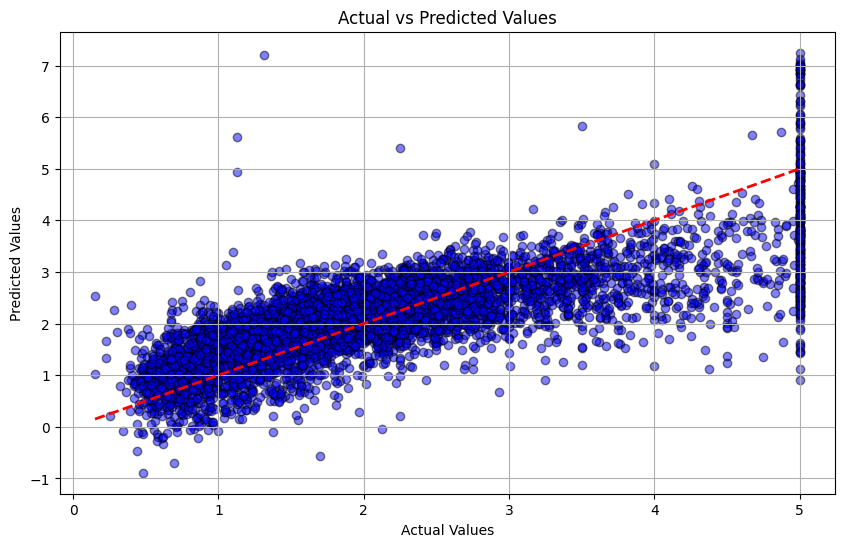

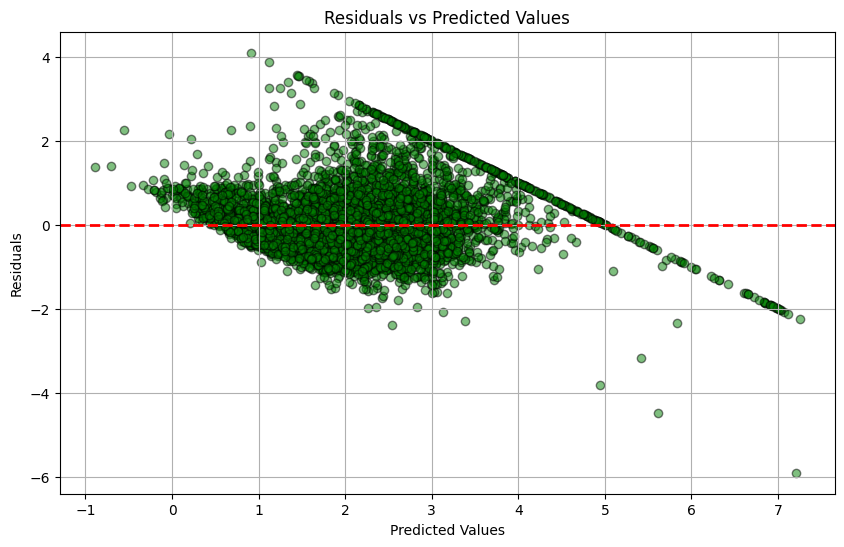

In [4]:
"""
This script generates two types of plots to visualize the performance of a linear regression model:

1. **Actual vs. Predicted Values Scatter Plot**:
   - This plot shows the relationship between the actual median house values (`y_test`) and the values predicted by the model (`y_predictions`).
   - A reference line (red dashed) is included to show where the predicted values would lie if they perfectly matched the actual values.

2. **Residuals vs. Predicted Values Scatter Plot**:
   - This plot shows the residuals (differences between actual and predicted values) against the predicted values.
   - It helps to assess if there are patterns in the residuals that might indicate problems with the model (e.g., non-linearity, heteroscedasticity).

Dependencies:
- matplotlib (for plotting)
- numpy (for numerical operations, if needed)
"""

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predictions, alpha=0.5, color='b', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')  # Label for the x-axis
plt.ylabel('Predicted Values')  # Label for the y-axis
plt.title('Actual vs Predicted Values')  # Title of the plot
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot

# Plotting the residuals
residuals = y_test - y_predictions  # Calculate residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_predictions, residuals, alpha=0.5, color='g', edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Reference line at y=0
plt.xlabel('Predicted Values')  # Label for the x-axis
plt.ylabel('Residuals')  # Label for the y-axis
plt.title('Residuals vs Predicted Values')  # Title of the plot
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot
